C:\Users\Ali Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8165
Confusion Matrix:
 [[1557   50]
 [ 317   76]]


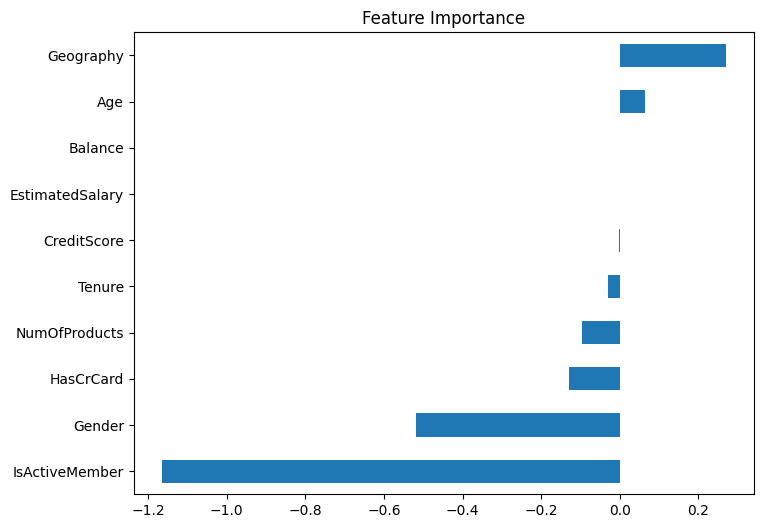

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv("Churn_Modelling.csv")
data.head()
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])
X = data.drop("Exited", axis=1)
y = data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()
